In [80]:
# 0. import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from IPython.display import HTML, display
print('Libraries imported.')

Libraries imported.


In [2]:
### Use geopy library to get the latitude and longitude values    
address = 'Redwood City'

geolocator = Nominatim(user_agent="rwc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Redwood City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Redwood City are 37.4863239, -122.2325233.


In [4]:
# 1. Search for a specific venue category
categoryId= '52af3b813cf9994f4e043c04'   #categoryID for Taiwanese restaurant.
radius= 100000                             #radius in meters

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius,
    categoryId)

# Send the GET Request and examine the results
results = requests.get(url).json()

In [7]:
df_rating = []

for venue_id in dataframe['id']:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #print(result['response']['venue'].keys())
    result['response']['venue'].keys()
    
    # Get the venue's overall rating
    try:
        #print(result['response']['venue']['rating'])
        df_rating.append(result['response']['venue']['rating'])
        
    except:
        #print('This venue has not been rated yet.')
        df_rating.append('This venue has not been rated yet.')
        
    
df_rating = pd.DataFrame(df_rating)
df_rating.head()

,0
0,This venue has not been rated yet.
1,7.8
2,6.6
3,This venue has not been rated yet.
4,This venue has not been rated yet.


In [26]:
df_combined1 = df_combined

# Apply unidecode to resolve Mandarin-English translation
from unidecode import unidecode
import ast
df_combined1['name'] = df_combined1['name'].apply(unidecode)
df_combined2 = df_combined1
df_combined2['location.city'] = df_combined2['location.city'].apply(unidecode)

In [40]:
df_combined3.head()

,name,Rating,location.lat,location.lng,location.postalCode,location.city
0,Shi Lin Tai Wan Xiao Chi Shihlin Taiwan Stree...,This venue has not been rated yet.,37.564380,-122.323584,94401.0,San Mateo
1,Fashion Wok Shi Shang Wan,7.8,37.376644,-122.030381,94086.0,Sang Ni Wei Er
2,Chick & Tea,6.6,37.363055,-122.025634,94087.0,Sunnyvale
3,WeHOUSE Gyoza,This venue has not been rated yet.,37.419329,-121.915786,95035.0,Milpitas
4,The Bento Box,This venue has not been rated yet.,37.423706,-121.918120,95035.0,Milpitas


In [61]:
# Remove Restaurants without Ratings
df_combined4 = df_combined3[df_combined3.Rating != 'This venue has not been rated yet.']

# Correct "Sang Ni Wei Er" to "Sunnyvale" lol
df_combined4.at[1,'location.city'] = 'Sunnyvale'
df_combined4

,name,Rating,location.lat,location.lng,location.postalCode,location.city
1,Fashion Wok Shi Shang Wan,7.8,37.376644,-122.030381,94086.0,Sunnyvale
2,Chick & Tea,6.6,37.363055,-122.025634,94087.0,Sunnyvale
7,Meet Fresh Xian Yu Xian,7.9,37.503169,-121.976276,94538.0,Fremont
8,Hodala,7.6,37.780165,-122.481625,94121.0,San Francisco
9,TP Tea Cha Tang Hui,8.2,37.311208,-122.023676,95014.0,Cupertino
10,Din Tai Fung Ding Tai Feng,8.2,37.326062,-121.944112,95050.0,Santa Clara
11,Liang's Village Cuisine,7.3,37.322202,-122.019201,95014.0,Cupertino
12,Taiwan Porridge Kingdom,8.3,37.336678,-122.040408,95014.0,Cupertino
13,Shihlin Taiwan Street Snacks Shi Lin Tai Wan X...,7.3,37.727818,-122.476466,94132.0,San Francisco
14,Shi Lin Tai Wan Xiao Chi Shihlin Taiwan Stree...,8.3,37.420884,-121.916434,95035.0,Milpitas


In [46]:
### Use geopy library to get the latitude and longitude values of New York City     
address = 'Redwood City, CA'

geolocator = Nominatim(user_agent="redwood_city_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Redwood City are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Redwood City are 37.4863239, -122.2325233.


In [47]:
map_redwoodcity = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for rest_name,lat, lng in zip(df_combined4['name'],df_combined4['location.lat'], df_combined4['location.lng']):
    label = '{}, {}, {}'.format(rest_name, lat, lng)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_redwoodcity)  
    
map_redwoodcity

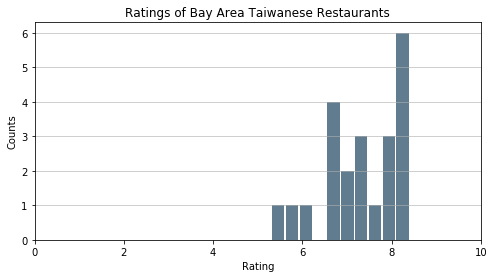

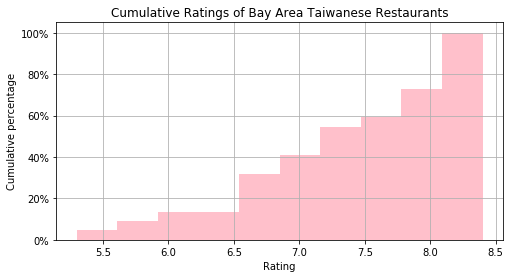

In [92]:
# 1. Histogram of Ratings Distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
df_combined5['Rating'].plot.hist(bins=10, rwidth=0.9, color='#607c8e')

plt.title('Ratings of Bay Area Taiwanese Restaurants')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
axes = plt.gca()
axes.set_xlim([0,10])

plt.show()

# 2. Cumulative Histogram of Ratings
fig, ax = plt.subplots(figsize=(8, 4))

n_bins=10
n, bins, patches = ax.hist( df_combined5['Rating'], n_bins, density=True, histtype='stepfilled',
                            color='pink', cumulative=True)
ax.grid(True)
ax.set_title('Cumulative Ratings of Bay Area Taiwanese Restaurants')
ax.set_xlabel('Rating')
ax.set_ylabel('Cumulative percentage')

# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.show()

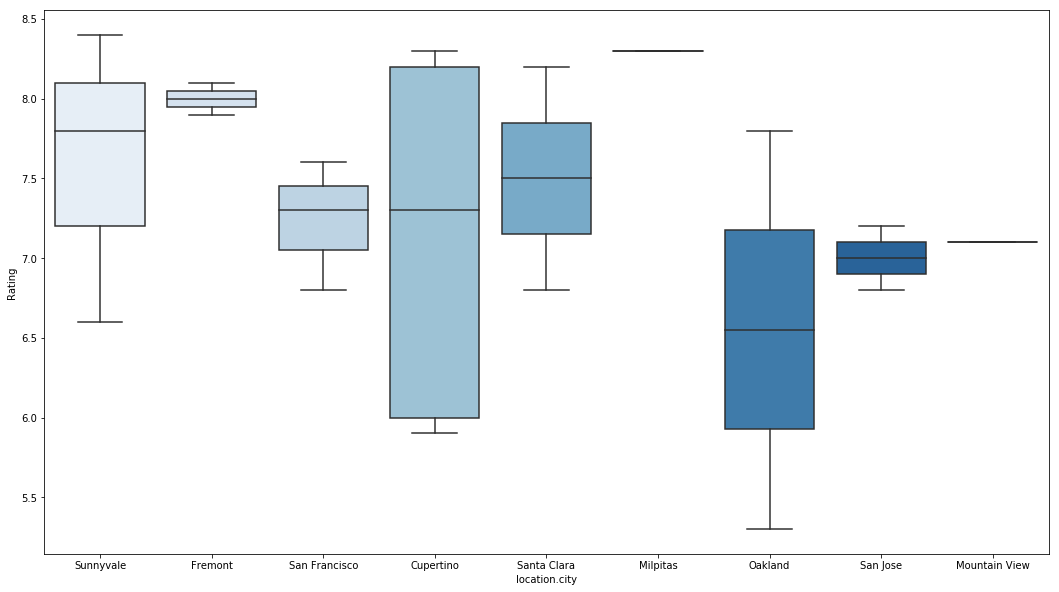

In [101]:
# Box Plot of Ratings by City
import seaborn as sns
fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(x= df_combined5["location.city"], y= df_combined5['Rating'], palette="Blues")
#sns.swarmplot (x= df_combined5["location.city"], y= df_combined5['Rating'], data = df_combined5, color="red")